Assignment 2 Imaging Basics

Question 2. 
Renate Eng 

In [81]:
# Library Imports
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy import signal, ndimage

# Setup Jupyter notebook specifics
%matplotlib inline

# Numpy printing help
np.set_printoptions(precision=2)


In [82]:
# Constants
data_directory = os.path.join('.', 'Data')

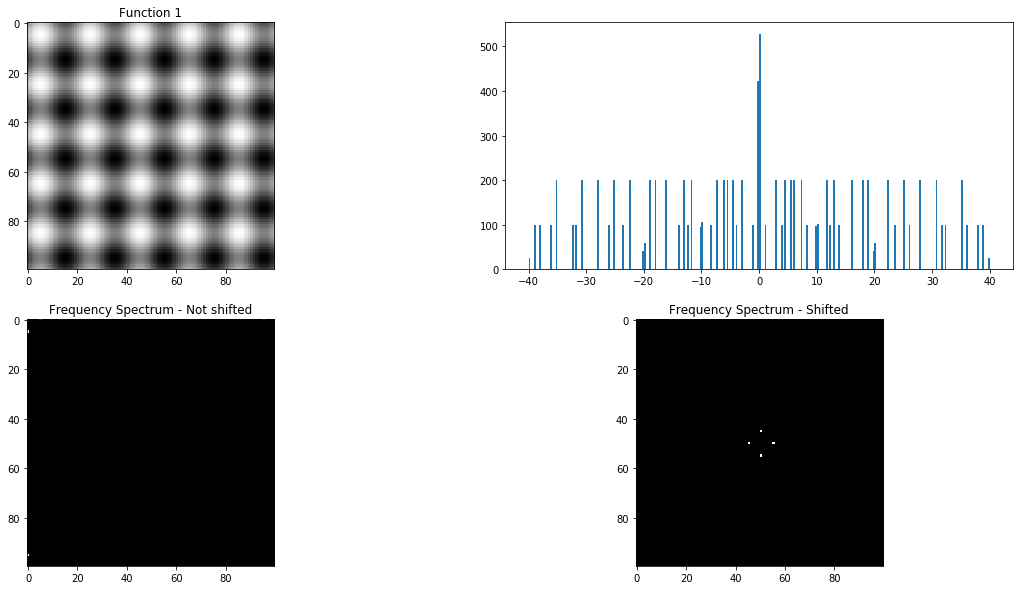

In [83]:
#Function 1. Draft the image
F = np.ones((100,100)) #Create empty matrix 100x100 pixels
fo = 0.05 #Define constant so that pattern is visible

for xvalue in range(F.shape[0]):
    for yvalue in range(F.shape[1]):
        F[xvalue,yvalue] = 20*np.sin(2*np.pi*fo*xvalue) + 20*np.sin(2*np.pi*fo*yvalue) #Function calculated at each pixel

#Function 1 Part a
plt.subplots(2, 2, figsize=(20,10))
plt.subplot(2, 2, 1); 
plt.imshow(F, cmap='gray')
plt.title('Function 1')
#Function is two sinusoid waves, one is rotated 90 degrees. The pattern gives four dots in diamond shape in frequency spectrum. 

#Function 1 Part b. Histogram
plt.subplot(2, 2, 2); plt.hist(F.ravel(), bins=256)

#Function 1 Part c. Frequency Spectrum
#Frequency spectrum from fourier transform of function. Code modified from Fourier Transform Notebook.
from matplotlib.colors import LogNorm

#2D Fourier transform
ImageFFT=np.fft.fft2(F)
ImageFFTMag=abs(ImageFFT)*2/100*2/100    # Note that fft is now normalized by 2/N and 2/M with an image NxM

# The 2D FFT, just as the 1D is repeated in 2 dimensions, if we want to see an image we need to shift it
ImageFFTMagShift=np.fft.fftshift(ImageFFTMag)

#Not needed but this prevents from having empty subplot, so I inserted this anyways
# This is the non shifted FFT
plt.subplot(2,2,3)
plt.imshow(ImageFFTMag, cmap='gray')
plt.title('Frequency Spectrum - Not shifted') 

# And the shifted FFT (note the repeats)
plt.subplot(2,2,4)
plt.imshow(ImageFFTMagShift, cmap='gray')
plt.title('Frequency Spectrum - Shifted')

plt.show()


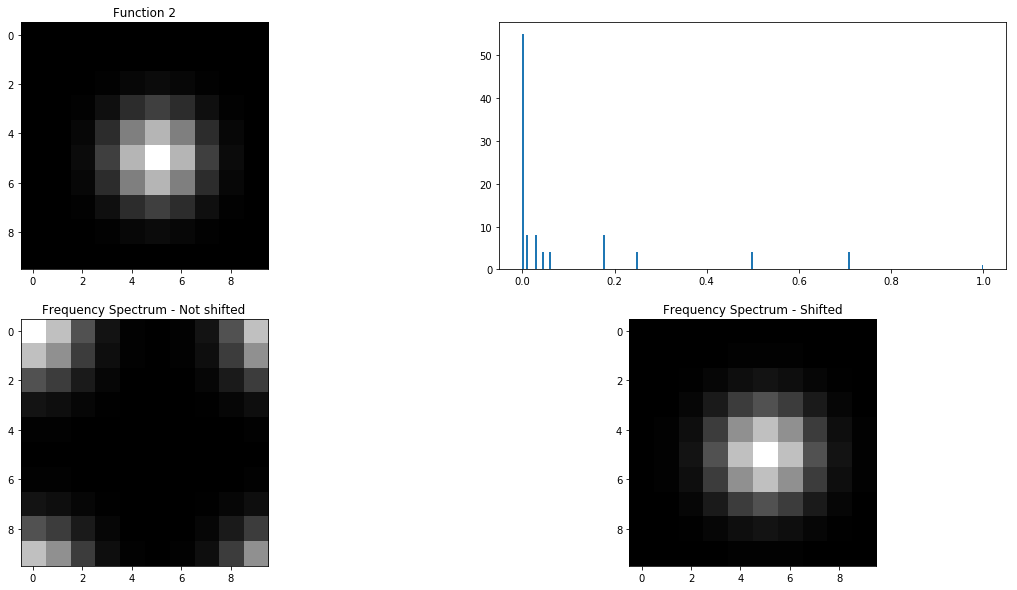

In [84]:
#Function 2. Draft the image
F = np.ones((10,10)) #empty 10x10 matrix

for xvalue in range(F.shape[0]):
    for yvalue in range(F.shape[1]):
        F[xvalue,yvalue] = 2**(-1*( ((xvalue - 5)**2)/2 + ((yvalue - 5)**2)/2)) #Function 2 calced at each pixel

#Function 2 Part a. 
plt.subplots(2, 2, figsize=(20,10))
plt.subplot(2, 2, 1); 
plt.imshow(F, cmap='gray')
plt.title('Function 2')
#Should be an exponential function

#Function 2 Part b.
plt.subplot(2, 2, 2); plt.hist(F.ravel(), bins=256)

#Function 2 Part c. Copied and modified from Fourier transform Notebook
from matplotlib.colors import LogNorm

#2D Fourier Transform
ImageFFT=np.fft.fft2(F)
ImageFFTMag=abs(ImageFFT)*2/100*2/100    # Note that fft is now normalized by 2/N and 2/M with an image NxM

# Shifting the image
ImageFFTMagShift=np.fft.fftshift(ImageFFTMag)

#Not needed but filled extra subplot 
# This is the non shifted FFT
plt.subplot(2,2,3)
plt.imshow(ImageFFTMag, cmap='gray')
plt.title('Frequency Spectrum - Not shifted')

# Frequency Spectrum 
plt.subplot(2,2,4)
plt.imshow(ImageFFTMagShift, cmap='gray')
plt.title('Frequency Spectrum - Shifted')

plt.show()

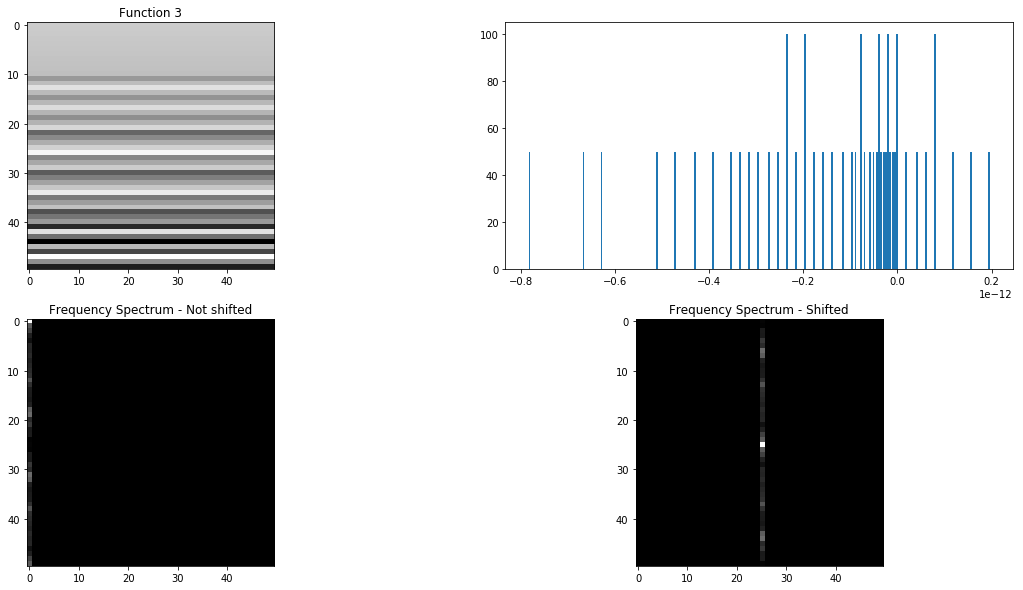

In [85]:
#Function 3. Draft the image
F = np.ones((50,50))
fo = 1

#Function 3 Part a.
for xvalue in range(F.shape[0]):
    for yvalue in range(F.shape[1]):
        F[xvalue,yvalue] = 20*np.sin(2*np.pi*fo*xvalue) #Function 3 applied to each pixel
plt.subplots(2, 2, figsize=(20,10))
plt.subplot(2, 2, 1); 
plt.imshow(F, cmap='gray')
plt.title('Function 3')
#Horizontal function will be vertical in frequency spectrum.

#Function 3 Part b. 
plt.subplot(2, 2, 2); plt.hist(F.ravel(), bins=256)

#Function 3 Part c. Copied and modified from Fourier Transform Notebook
from matplotlib.colors import LogNorm

# 2D Fourier Transform
ImageFFT=np.fft.fft2(F)
ImageFFTMag=abs(ImageFFT)*2/100*2/100    # Note that fft is now normalized by 2/N and 2/M with an image NxM

# Shift image
ImageFFTMagShift=np.fft.fftshift(ImageFFTMag)

#Unneeded but kept in order to fill extra subplot
# This is the non shifted FFT
plt.subplot(2,2,3)
plt.imshow(ImageFFTMag, cmap='gray')
plt.title('Frequency Spectrum - Not shifted')

# Needed Frequency Spectrum
plt.subplot(2,2,4)
plt.imshow(ImageFFTMagShift, cmap='gray')
plt.title('Frequency Spectrum - Shifted')
plt.show()

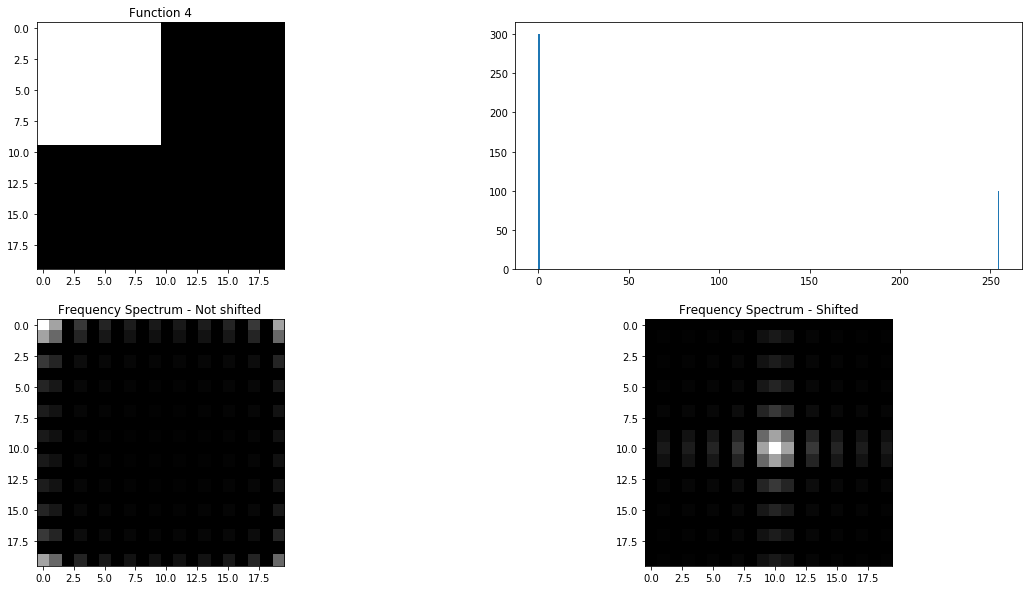

In [86]:
#Function 4. Draft the image
F = np.ones((20,20))
fo = 1

#Function 4. Part a.
for xvalue in range(F.shape[0]):
    for yvalue in range(F.shape[1]):
        x = np.piecewise(xvalue, [-10<xvalue<10, -10>xvalue, xvalue>10], [1,0,0]) #Implement piecewise function for x values
        y = np.piecewise(yvalue, [-10<yvalue<10, -10>yvalue, yvalue>10], [1,0,0]) #Implement piecewise function for y values
        if x==1 and y ==1:
            F[xvalue,yvalue]=255 #If both x and y = 1, then set F(x,y) to 255 (white) 
        else:
            F[xvalue,yvalue]=0 #Everything else black
plt.subplots(2, 2, figsize=(20,10))
plt.subplot(2, 2, 1); 
plt.imshow(F, cmap='gray')
plt.title('Function 4')
#Doesn't show negatives because I couldn't figure out how to code negative incrementing values. 
#Image should be a white square surrounded by black on all sides. This is a square function.

#Function 4 Part b. 
plt.subplot(2, 2, 2); plt.hist(F.ravel(), bins=256)

# Function 4 Part c.Copied and modified from Fourier Transform Notebook
from matplotlib.colors import LogNorm

# 2D Fourier Transform
ImageFFT=np.fft.fft2(F)
ImageFFTMag=abs(ImageFFT)*2/100*2/100    # Note that fft is now normalized by 2/N and 2/M with an image NxM

# 2D Fourier Transform
ImageFFTMagShift=np.fft.fftshift(ImageFFTMag)

#Not needed, but fills the extra subplot position
# This is the non shifted FFT
plt.subplot(2,2,3)
plt.imshow(ImageFFTMag, cmap='gray')
plt.title('Frequency Spectrum - Not shifted')

#Needed Frequency spectrum
# And the shifted FFT (note the repeats)
plt.subplot(2,2,4)
plt.imshow(ImageFFTMagShift, cmap='gray')
plt.title('Frequency Spectrum - Shifted')

plt.show()